In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

In [2]:
#### Merge the 12 months dataset

In [3]:
df= pd.read_csv('D:\Pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv')
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
files= [file for file in os.listdir('D:\Pandas\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data')]

all_months_data= pd.DataFrame()
for file in files:
    df= pd.read_csv("D:\\Pandas\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\" + file)
    all_months_data= pd.concat([all_months_data, df])
    
all_months_data.head()

all_months_data.to_csv("allData.csv")
allData= pd.read_csv("allData.csv", index_col=0)

In [5]:

allData.head()
print("Total nan values: ",allData.isna().sum().sum())

Total nan values:  3270


# Augment data with additional columns



Drop NAN

In [6]:
nan_df= allData[allData.isna().any(axis=1)]

allData= allData.dropna(how='all')
allData.head()
print("Total nan values: ",allData.isna().sum().sum())

Total nan values:  0


In [7]:
#Find or and delete it

allData= allData[allData['Order Date'].str[0:2]!='Or']
allData.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


convert types correctly

In [8]:
allData['Quantity Ordered']= pd.to_numeric(allData['Quantity Ordered'])
allData['Price Each']= pd.to_numeric(allData['Price Each'])

Add Month column:

In [9]:
allData['Month']= allData['Order Date'].str[:2]
allData['Month']= allData['Month'].astype('int32')
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Q1 what was the best month for sales? how much was earned:

In [10]:
allData['Sales']= allData['Quantity Ordered'].astype('int') * allData['Price Each'].astype('float')
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [11]:
grouped= allData.groupby('Month')
results=grouped.sum()
print(results)

       Quantity Ordered  Price Each       Sales
Month                                          
1                 10903  1811768.38  1822256.73
2                 13449  2188884.72  2202022.42
3                 17005  2791207.83  2807100.38
4                 20558  3367671.02  3390670.24
5                 18667  3135125.13  3152606.75
6                 15253  2562025.61  2577802.26
7                 16072  2632539.56  2647775.76
8                 13448  2230345.42  2244467.88
9                 13109  2084992.09  2097560.13
10                22703  3715554.83  3736726.88
11                19798  3180600.68  3199603.20
12                28114  4588415.41  4613443.34


plotting the sales

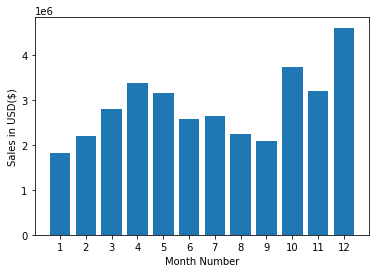

In [12]:
months= range(1,13)

plt.xticks(months)
plt.ylabel('Sales in USD($)')
plt.xlabel('Month Number')
plt.bar(months, results['Sales'])
plt.show()

# Q2 what is the city where is the highest sale:

Add a city in df

In [13]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

allData['City']= allData['Purchase Address'].apply(lambda x: get_city(x)+" ("+ get_state(x)+")" )

allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [14]:
cityGroup= allData.groupby('City')
salesResult=cityGroup.sum()
cityNames= [city for city, df in cityGroup] # orders the cities as the serial given in groupby
print(cityNames)

[' Atlanta (GA)', ' Austin (TX)', ' Boston (MA)', ' Dallas (TX)', ' Los Angeles (CA)', ' New York City (NY)', ' Portland (ME)', ' Portland (OR)', ' San Francisco (CA)', ' Seattle (WA)']


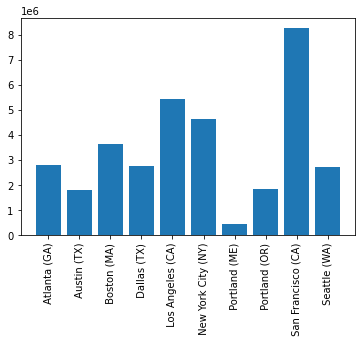

In [15]:

plt.bar(cityNames, salesResult['Sales'])   # we have to order correctly the x and y values
plt.xticks(cityNames, rotation= 'vertical')
plt.show()


# Which Order time is better:

In [16]:
allData['Order Date']= pd.to_datetime(allData['Order Date'])

In [17]:
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [18]:
allData['Hour']= allData['Order Date'].dt.hour     # hour column with only hour values
allData.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9


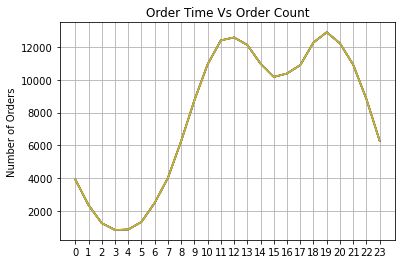

In [62]:
groupHour= allData.groupby('Hour')
hourResult= groupHour.sum()


hr= range(0,24)

plt.plot(hr, groupHour.count())

plt.xticks(hr)
plt.grid()
plt.title("Order Time Vs Order Count")
plt.ylabel("Number of Orders")
plt.show()

# What producs are sold together

In [20]:
groupedOrderID= allData.groupby('Order ID')

In [21]:
df= allData[allData['Order ID'].duplicated(keep= False)]  #have to use keep with duplicated 

df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head(5)

#df= df[['Order ID','Grouped']].drop_duplicates()
#df.head()


C:\Users\MN\AppData\Local\Temp/ipykernel_9392/1848679638.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']= df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


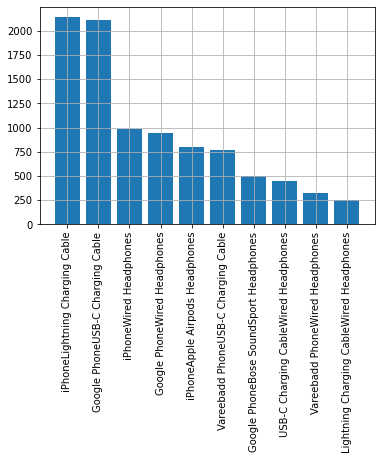

In [80]:
from itertools import combinations
from collections import Counter

count= Counter()

for row in df['Grouped']:
    row_list= row.split(',')
    count.update(Counter(combinations(row_list,2)))

#count.most_common(10) #gives a dict of key(items) & value(number of occerance)

#for key, value in count.most_common(10):

#print(key,value)
itemList=[]
counted=[]
for items in count.most_common(10):
    itemList.append(''.join(items[0][0:]))
    counted.append(items[1])
#print(counted)

plt.bar(itemList, counted, )
plt.xticks(itemList, rotation= 'vertical')
plt.grid()

plt.show()

In [43]:
print(count.most_common(10))

[(('iPhone', 'Lightning Charging Cable'), 2140), (('Google Phone', 'USB-C Charging Cable'), 2116), (('iPhone', 'Wired Headphones'), 987), (('Google Phone', 'Wired Headphones'), 949), (('iPhone', 'Apple Airpods Headphones'), 799), (('Vareebadd Phone', 'USB-C Charging Cable'), 773), (('Google Phone', 'Bose SoundSport Headphones'), 503), (('USB-C Charging Cable', 'Wired Headphones'), 452), (('Vareebadd Phone', 'Wired Headphones'), 327), (('Lightning Charging Cable', 'Wired Headphones'), 253)]


# Q5 What product sold the most and why?

In [86]:
groupedProduct=allData.groupby("Product")
#groupedProduct.sum().sort_values(by='Quantity Ordered', ascending= False)
groupedProduct.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815


In [103]:
quantity= groupedProduct['Quantity Ordered'].sum()
product=  [product for product, df in groupedProduct]  # serialling the products as in the group
#print(product)
print(quantity)

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64


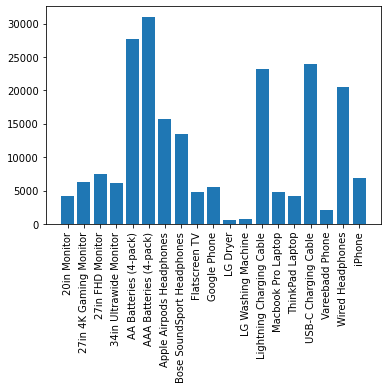

In [105]:
plt.bar(product, quantity)
plt.xticks(product, rotation= 'vertical')
plt.show()

In [112]:
prices= allData.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\MN\AppData\Local\Temp/ipykernel_9392/1347430347.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product, rotation='vertical', size=8)
C:\Users\MN\AppData\Local\Temp/ipykernel_9392/1347430347.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


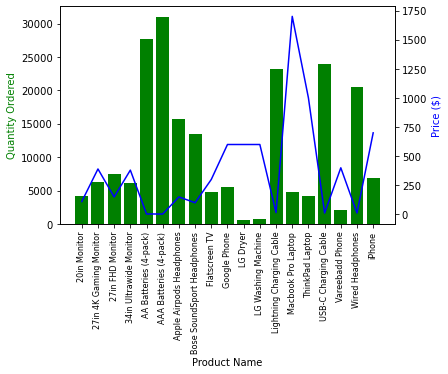

In [115]:
#showing co-relation between price and sells
# in most cases we see that if price is low, quantity sold is greated.

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, quantity, color='g')
ax2.plot(product, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(product, rotation='vertical', size=8)

fig.show()